___
<h1> Machine Learning </h1>
<h2> M. Sc. in Electrical and Computer Engineering </h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[MEEC](https://ise.ualg.pt/en/curso/1477) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)
___

# Cross validation

Cross validation is a technique used to evaluate the performance of a model. It is particularly useful when the amount of data is limited, as it allows to use all the data for training and testing.


|# train|Fold 1 |Fold 2 |Fold 3 |Fold 4 |Fold 5|
|-------|-------|-------|-------|-------|------|
|1      |__Test__   |Train  |Train  |Train  |Train |
|2      |Train  |__Test__   |Train  |Train  |Train |
|3      |Train  |Train  |__Test__   |Train  |Train |
|4      |Train  |Train  |Train  |__Test__   |Train |
|5      |Train  |Train  |Train  |Train  |__Test__  |

The process is as follows:
1. Split the data into k parts (folds)
2. Train the model on k-1 parts and test on the remaining part
3. Repeat the process k times, each time using a different part as the test set
4. Compute the average performance of the model
5. Optionally, compute the standard deviation of the performance
6. Train the model on the entire dataset using the best hyperparameters found in the cross-validation process

There are some drawbacks to this method, such as:
- It is computationally expensive, as it requires training the model k times
- It does not provide a model that can be used for prediction, as the model is trained on a different dataset each time
- It can be sensitive to the way the data is split
- It can be sensitive to the choice of k


Using scikit-learn, cross-validation can be done using the `cross_val_score` function. Let us see an example using the iris dataset and a logistic regression model.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

Load the iris dataset and define a Logistic Regression classification model

In [2]:
iris = load_iris()

log_reg = LogisticRegression(
                        random_state=1, 
                        C=200,
                        solver='lbfgs',
                        max_iter=10000)

To compute the accuracy of the model a cross validation score is now used

In [3]:
scores = cross_val_score(estimator=log_reg, # model
                         X=iris.data, y=iris.target, # X, y
                         cv=5,       #number of folds - default 5-fold cross validation (see alternatives in documentation)
                         n_jobs=-1,  # use all CPU
                         verbose=1,   # verbose level 
                        )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


The computed scores, which are the accuracy of the model in each fold, are stored in the variable `scores`.

In [4]:
scores

array([1.        , 1.        , 0.93333333, 0.93333333, 1.        ])

Average CV score - we can conclude that we expect the model to be around x% accurate on average

In [5]:
scores.mean()

0.9733333333333334

And the standard deviation

In [6]:
scores.std()

0.03265986323710903

Having multiple splits of the data also provides some information about how sensitive our model is to the selection of the training dataset. For the iris dataset, we saw accuracies between ~90% and 100%. This is quite a range, and it provides us with an idea about how the model might perform in the worst case and best case scenarios when applied to new data.

The main disadvantage of cross-validation is increased computational cost. As we are now training k models instead of a single model, cross-validation will be roughly $k$ times slower than doing a single split of the data.

# Stratified k-Fold Cross-Validation and Other Strategies

## k-fold's

Splitting the dataset into k folds by starting with the first one-k-th part of the data, as described in the previous section, might not always be a good idea.

How would a 3 fold CV work over a dataset with the data ordered as in the iris dataset!?

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Note that `cross_val_score` by default, classification, uses **stratified k-fold cross-validation**: split the data such that the proportions between classes are the same in each fold as they are in the whole dataset. So the results were not so bad as using standard CV.

Let us see how bad it could be (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html):

In [8]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3, 
              shuffle=False)

cross_val_score(estimator=log_reg, 
                X=iris.data, 
                y=iris.target, 
                cv=kfold #  int, cross-validation generator or an iterable, optional
               )

array([0., 0., 0.])

0! Why!!????? Can you guess?

with a 5-fold we have some improvements, but...

In [9]:
kfold = KFold(n_splits=5, 
              shuffle=False)

cross_val_score(estimator=log_reg, 
                X=iris.data, 
                y=iris.target, 
                cv=kfold #  int, cross-validation generator or an iterable, optional
               )

array([1.        , 1.        , 0.86666667, 1.        , 0.83333333])

Kfold class allows us to shuffle the data
(https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

In [10]:
kfold = KFold(n_splits=3, 
              shuffle=True, 
              random_state=0)

cross_val_score(estimator=log_reg, 
                X=iris.data, 
                y=iris.target, 
                cv=kfold 
               )

array([0.98, 0.98, 0.96])

## Stratified k-fold

Basically, this does the same as the first CV computation, but with stratified data

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

In [11]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold()

score = cross_val_score(estimator=log_reg, 
                X=iris.data, 
                y=iris.target, 
                cv=skf #  int, cross-validation generator or an iterable, optional
               )
score

array([1.        , 1.        , 0.93333333, 0.93333333, 1.        ])

## Leave-one-out CV

Leave-one-out cross-validation:  is as $k$-fold cross-validation where each fold is a single sample. For each split, you pick a single data point to be the test set. 
        
This can be very time consuming, particularly for large datasets, but sometimes provides better estimates on small datasets

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn.model_selection.LeaveOneOut


In [12]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

score = cross_val_score(estimator=log_reg, 
                X=iris.data, 
                y=iris.target, 
                cv=loo, #  int, cross-validation generator or an iterable, optional
                verbose=True,
                        n_jobs=-1
               )
score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.7s finished


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
len(score)

150

In [14]:
score.mean()

0.98

In [15]:
score.std()

0.13999999999999999

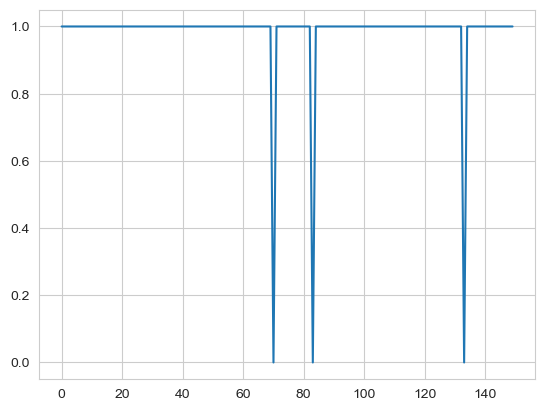

In [16]:
plt.plot(score)
plt.show()

## Shuffle-split cross-validation

In shuffle-split cross-validation, each split samples `train_size` many points for the training set and `test_size` many (disjoint) point for the test set.
This splitting is repeated `n_iter` times. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit

In [17]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=10, 
                  train_size=.75, 
                  #     test_size wil be complement of the train_size
                  random_state=1)

score = cross_val_score(estimator=log_reg, 
                X=iris.data, 
                y=iris.target,  
                cv=ss)
score

array([1.        , 0.97368421, 0.97368421, 1.        , 0.94736842,
       1.        , 0.97368421, 1.        , 0.94736842, 1.        ])

In [18]:
score.mean()

0.9815789473684211

## Stratified Shuffle-split cross-validation
There is also a stratified variant of ShuffleSplit, aptly named StratifiedShuffleSplit, which can provide more reliable results for classification tasks.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(
    n_splits=10, 
    train_size=.75, 
#     test_size wil be complement of the train_size
    random_state=1)

score = cross_val_score(estimator=log_reg, 
                X=iris.data, 
                y=iris.target, 
                cv=sss)
score

array([1.        , 1.        , 0.97368421, 0.94736842, 0.94736842,
       1.        , 0.94736842, 1.        , 1.        , 0.94736842])

In [20]:
score.mean()

0.9763157894736842

See https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection for other options